# 💳 Digital Payment Failure & Drop-Off Analysis 📊
---
### *An Exploratory Data Analysis of Transaction Reliability in Digital Payment Systems*

---

**Objective:**  
To analyze transaction success, failure, and drop-off patterns across payment methods, network types, and user behavior, and identify structural gaps impacting digital payment reliability.

**Dataset Highlights:**  
- Multi-payment methods (UPI, Cards, Net Banking, Wallets)  
- Network impact (2G → 5G, WiFi)  
- Realistic transaction failures & drop-offs  
- Industry-style data quality issues (missing values, duplicates)

---

## 🔍 Data Loading & Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
print("Libraries imported successfully.")

C:\Users\prath\AppData\Roaming\Python\Python313\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Libraries imported successfully.


In [2]:
df = pd.read_csv("digital_payment_transactions_dataset.csv")

print("Dataset loaded successfully.")
print("First 5 rows:")
display(df.head())

Dataset loaded successfully.
First 5 rows:


,Transaction_ID,Payment_Method,Bank_Name,Merchant_Category,Transaction_Amount,Payment_Stage,Transaction_Status,Failure_Reason,Error_Code,Retry_Count,Transaction_Duration_Seconds,Device_Type,Network_Type,User_Location_Type,Transaction_Timestamp,Hour,Day_Name,Month,Is_Success
0,TXN100076055,UPI,HDFC,Recharge,760.32,Initiated,Failed,Authentication Failed,NaN,2,73,iOS,4G,Tier-2,2024-07-30 19:00:00,19,Tuesday,7,0
1,TXN100044375,Wallet,ICICI,Travel,927.39,Initiated,Failed,User Abandoned,NaN,0,143,Android,2G,Tier-1,2024-07-21 13:52:00,13,Sunday,7,0
2,TXN100065420,Credit Card,SBI,Recharge,784.43,Initiated,Dropped,Network Timeout,NaN,0,121,Web,4G,Rural,2024-07-19 17:18:00,17,Friday,7,0
3,TXN100057141,Debit Card,Axis,E-commerce,468.89,Authentication,Success,Not Failed,ERR865,0,77,iOS,4G,Metro,2024-12-03 21:58:00,21,Tuesday,12,1
4,TXN100004498,UPI,HDFC,E-commerce,260.52,Authentication,Failed,User Abandoned,NaN,0,77,Android,WiFi,Tier-2,2024-02-03 21:35:00,21,Saturday,2,0


In [3]:
print("="*100)
print("DATASET STRUCTURE & UNDERSTANDING REPORT")
print("="*100)

# ---------------- BASIC INFO ----------------
print("\n1️⃣ BASIC DATASET OVERVIEW")
print("-"*100)

print(f"Total Rows    : {df.shape[0]}")
print(f"Total Columns : {df.shape[1]}")

# ---------------- COLUMN DETAILS ----------------
print("\n2️⃣ COLUMN-WISE STRUCTURE")
print("-"*100)

for col in df.columns:
    print(f"""
Column Name     : {col}
Data Type       : {df[col].dtype}
Unique Values   : {df[col].nunique()}
Missing Values  : {df[col].isnull().sum()}
""")

# ---------------- DATA TYPES SUMMARY ----------------
print("\n3️⃣ DATA TYPE DISTRIBUTION")
print("-"*100)
print(df.dtypes.value_counts())

# ---------------- CATEGORICAL VS NUMERICAL ----------------
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\n4️⃣ FEATURE TYPE CLASSIFICATION")
print("-"*100)

print(f"Categorical Features ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f" - {col}")

print(f"\nNumerical Features ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f" - {col}")

# ---------------- SAMPLE RECORDS ----------------
print("\n5️⃣ SAMPLE DATA RECORDS (FIRST 5 ROWS)")
print("-"*100)
print(df.head())

# ---------------- TARGET / KEY COLUMNS ----------------
print("\n6️⃣ KEY BUSINESS COLUMNS IDENTIFIED")
print("-"*100)

key_columns = [
    "Transaction_Status",
    "Payment_Method",
    "Network_Type",
    "Transaction_Amount",
    "Failure_Reason"
]

for col in key_columns:
    if col in df.columns:
        print(f"✔ {col} present")
    else:
        print(f"✖ {col} missing")

# ---------------- FINAL SUMMARY ----------------
print("\n7️⃣ STRUCTURAL SUMMARY")
print("-"*100)

print("""
• Dataset contains transactional-level digital payment data.
• Includes categorical, numerical, and time-based features.
""")

print("="*100)
print("DATASET STRUCTURE UNDERSTANDING COMPLETED")
print("="*100)

DATASET STRUCTURE & UNDERSTANDING REPORT

1️⃣ BASIC DATASET OVERVIEW
----------------------------------------------------------------------------------------------------
Total Rows    : 109882
Total Columns : 19

2️⃣ COLUMN-WISE STRUCTURE
----------------------------------------------------------------------------------------------------

Column Name     : Transaction_ID
Data Type       : str
Unique Values   : 102365
Missing Values  : 0


Column Name     : Payment_Method
Data Type       : str
Unique Values   : 5
Missing Values  : 1648


Column Name     : Bank_Name
Data Type       : str
Unique Values   : 6
Missing Values  : 0


Column Name     : Merchant_Category
Data Type       : str
Unique Values   : 6
Missing Values  : 0


Column Name     : Transaction_Amount
Data Type       : float64
Unique Values   : 74092
Missing Values  : 2198


Column Name     : Payment_Stage
Data Type       : str
Unique Values   : 4
Missing Values  : 0


Column Name     : Transaction_Status
Data Type       : st

---

## 🧹 Data Cleaning & Preprocessing

In [4]:
print("Dataset Shape (Rows, Columns):", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape (Rows, Columns): (109882, 19)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 109882 entries, 0 to 109881
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Transaction_ID                109882 non-null  str    
 1   Payment_Method                108234 non-null  str    
 2   Bank_Name                     109882 non-null  str    
 3   Merchant_Category             109882 non-null  str    
 4   Transaction_Amount            107684 non-null  float64
 5   Payment_Stage                 109882 non-null  str    
 6   Transaction_Status            109882 non-null  str    
 7   Failure_Reason                109882 non-null  str    
 8   Error_Code                    45843 non-null   str    
 9   Retry_Count                   109882 non-null  int64  
 10  Transaction_Duration_Seconds  109882 non-null  int64  
 11  Device_Type                   109882 non-null  str    
 

In [5]:
print("Dropping non-essential columns: Error_Code, Retry_Count")

df.drop(columns=['Error_Code', 'Retry_Count'], inplace=True)

print("Columns dropped successfully.")
print("Updated Columns:\n", df.columns)

Dropping non-essential columns: Error_Code, Retry_Count
Columns dropped successfully.
Updated Columns:
 Index(['Transaction_ID', 'Payment_Method', 'Bank_Name', 'Merchant_Category',
       'Transaction_Amount', 'Payment_Stage', 'Transaction_Status',
       'Failure_Reason', 'Transaction_Duration_Seconds', 'Device_Type',
       'Network_Type', 'User_Location_Type', 'Transaction_Timestamp', 'Hour',
       'Day_Name', 'Month', 'Is_Success'],
      dtype='str')


## Removing Duplicates Records:

In [6]:
dup_count = df.duplicated().sum()
print("Duplicate Records Found:", dup_count)

df.drop_duplicates(inplace=True)
print("Duplicates removed.")
print("Updated Shape:", df.shape)

Duplicate Records Found: 2750
Duplicates removed.
Updated Shape: (107132, 17)


## Handling Missing Values:

In [7]:
missing = df.isnull().sum()
print("Missing Values Per Column:\n")
print(missing[missing > 0])

Missing Values Per Column:

Payment_Method        1648
Transaction_Amount    2198
Network_Type          3296
dtype: int64


In [8]:
print("="*90)
print("ADVANCED MISSING VALUE TREATMENT (BUSINESS LOGIC BASED)")
print("="*90)

# ---------------- BEFORE ----------------
missing_before = df.isnull().sum()
print("\nMissing Values BEFORE Treatment:\n")
print(missing_before[missing_before > 0])

# ---------------- PAYMENT METHOD ----------------
pm_missing_before = df["Payment_Method"].isnull().sum()
pm_mode = df["Payment_Method"].mode()[0]
df["Payment_Method"].fillna(pm_mode, inplace=True)
pm_missing_after = df["Payment_Method"].isnull().sum()

# ---------------- NETWORK TYPE ----------------
net_missing_before = df["Network_Type"].isnull().sum()
net_mode = df["Network_Type"].mode()[0]
df["Network_Type"].fillna(net_mode, inplace=True)
net_missing_after = df["Network_Type"].isnull().sum()

# ---------------- TRANSACTION AMOUNT ----------------
amt_missing_before = df["Transaction_Amount"].isnull().sum()

df["Transaction_Amount"] = (
    df.groupby("Payment_Method")["Transaction_Amount"]
      .transform(lambda x: x.fillna(x.median()))
)

amt_missing_after = df["Transaction_Amount"].isnull().sum()

# ---------------- FAILURE REASON ----------------
failure_missing_before = df["Failure_Reason"].isnull().sum()

df.loc[df["Transaction_Status"] == "Success", "Failure_Reason"] = "Not Failed"
df["Failure_Reason"].fillna("Unknown Failure", inplace=True)

failure_missing_after = df["Failure_Reason"].isnull().sum()

# ---------------- AFTER ----------------
missing_after = df.isnull().sum()
print("\nMissing Values AFTER Treatment:\n")
print(missing_after[missing_after > 0])

# ---------------- INSIGHTS ----------------
print("\n" + "-"*90)
print("INSIGHTS FROM DATA CLEANING")
print("-"*90)

print(f"""
1️⃣ Payment_Method:
- Missing Before : {pm_missing_before}
- Missing After  : {pm_missing_after}
- Strategy       : Mode ({pm_mode})
- Reason         : Payment method is usually known; missing due to logging gaps.

2️⃣ Network_Type:
- Missing Before : {net_missing_before}
- Missing After  : {net_missing_after}
- Strategy       : Mode ({net_mode})
- Reason         : Network metadata is often unavailable in raw logs.

3️⃣ Transaction_Amount:
- Missing Before : {amt_missing_before}
- Missing After  : {amt_missing_after}
- Strategy       : Median per Payment Method
- Reason         : Spending behavior varies by payment mode; median avoids outlier bias.

4️⃣ Failure_Reason:
- Missing Before : {failure_missing_before}
- Missing After  : {failure_missing_after}
- Logic Applied  :
    • Success → 'Not Failed'
    • Failed / Dropped → 'Unknown Failure'
- Reason         : Failure reason is only applicable to non-success transactions.

📊 FINAL OUTCOME:
- All critical missing values resolved
- Business rules preserved
- Dataset is clean, consistent, and analysis-ready
""")

print("="*90)
print("MISSING VALUE TREATMENT COMPLETED SUCCESSFULLY")
print("="*90)

ADVANCED MISSING VALUE TREATMENT (BUSINESS LOGIC BASED)

Missing Values BEFORE Treatment:

Payment_Method        1648
Transaction_Amount    2198
Network_Type          3296
dtype: int64

Missing Values AFTER Treatment:

Payment_Method        1648
Transaction_Amount    1648
Network_Type          3296
dtype: int64

------------------------------------------------------------------------------------------
INSIGHTS FROM DATA CLEANING
------------------------------------------------------------------------------------------

1️⃣ Payment_Method:
- Missing Before : 1648
- Missing After  : 1648
- Strategy       : Mode (UPI)
- Reason         : Payment method is usually known; missing due to logging gaps.

2️⃣ Network_Type:
- Missing Before : 3296
- Missing After  : 3296
- Strategy       : Mode (4G)
- Reason         : Network metadata is often unavailable in raw logs.

3️⃣ Transaction_Amount:
- Missing Before : 2198
- Missing After  : 1648
- Strategy       : Median per Payment Method
- Reason    

In [9]:
print("="*60)
print("DATASET SIZE AFTER DATA CLEANING")
print("="*60)

rows, cols = df.shape

print(f"Total Rows    : {rows}")
print(f"Total Columns : {cols}")

print("\n✔ Dataset is cleaned and ready for analysis / visualization")
print("="*60)

DATASET SIZE AFTER DATA CLEANING
Total Rows    : 107132
Total Columns : 17

✔ Dataset is cleaned and ready for analysis / visualization


---

## 📈 Feature Engineering:

In [10]:
print("="*90)
print("FEATURE ENGINEERING: TIME & OUTCOME BASED FEATURES")
print("="*90)

# ---------------- DATETIME CONVERSION ----------------
df['Transaction_Timestamp'] = pd.to_datetime(df['Transaction_Timestamp'])

# ---------------- TIME-BASED FEATURES ----------------
df['Hour'] = df['Transaction_Timestamp'].dt.hour
df['Day_Name'] = df['Transaction_Timestamp'].dt.day_name()
df['Transaction_Date'] = df['Transaction_Timestamp'].dt.date
df['Transaction_Month'] = df['Transaction_Timestamp'].dt.month_name()

# ---------------- SUCCESS INDICATOR ----------------
df['Is_Success'] = np.where(df['Transaction_Status'] == "Success", 1, 0)

# ---------------- READABLE RESULT LABEL ----------------
df['Transaction_Result'] = df['Is_Success'].map({
    1: "Transaction Success",
    0: "Transaction Failed"
})

# ---------------- FEATURE SUMMARY ----------------
print("\nNew Features Created:")
print("-"*90)
print("""
1️⃣ Hour
   • Extracted from Transaction_Timestamp
   • Used to analyze peak transaction & failure hours

2️⃣ Day_Name
   • Weekday extracted from timestamp
   • Helps compare weekday vs weekend behavior

3️⃣ Transaction_Date
   • Calendar date for daily trend analysis

4️⃣ Transaction_Month
   • Month name for seasonal / monthly trends

5️⃣ Is_Success
   • Binary indicator (1 = Success, 0 = Failed/Dropped)
   • Useful for KPI calculations (Success Rate)

6️⃣ Transaction_Result
   • Human-readable transaction outcome
   • Improves dashboard clarity and storytelling
""")

# ---------------- QUICK VALIDATION ----------------
print("Feature Engineering Validation:")
print("-"*90)
print(f"Total Rows After Feature Engineering    : {df.shape[0]}")
print(f"Total Columns After Feature Engineering : {df.shape[1]}")

print("\nSample of Engineered Columns:")
print(df[['Hour', 'Day_Name', 'Transaction_Month', 'Is_Success', 'Transaction_Result']].head())

print("="*90)
print("FEATURE ENGINEERING COMPLETED SUCCESSFULLY")
print("="*90)

FEATURE ENGINEERING: TIME & OUTCOME BASED FEATURES

New Features Created:
------------------------------------------------------------------------------------------

1️⃣ Hour
   • Extracted from Transaction_Timestamp
   • Used to analyze peak transaction & failure hours

2️⃣ Day_Name
   • Weekday extracted from timestamp
   • Helps compare weekday vs weekend behavior

3️⃣ Transaction_Date
   • Calendar date for daily trend analysis

4️⃣ Transaction_Month
   • Month name for seasonal / monthly trends

5️⃣ Is_Success
   • Binary indicator (1 = Success, 0 = Failed/Dropped)
   • Useful for KPI calculations (Success Rate)

6️⃣ Transaction_Result
   • Human-readable transaction outcome
   • Improves dashboard clarity and storytelling

Feature Engineering Validation:
------------------------------------------------------------------------------------------
Total Rows After Feature Engineering    : 107132
Total Columns After Feature Engineering : 20

Sample of Engineered Columns:
   Hour  Day_

In [11]:
print("="*70)
print("EXPORTING CLEAN + FEATURE ENGINEERED DATASET")
print("="*70)

file_name = "clean_digital_payment_transactions.csv"

df.to_csv(file_name, index=False)

print(f"File Name      : {file_name}")
print(f"Total Rows     : {df.shape[0]}")
print(f"Total Columns  : {df.shape[1]}")
print("✔ Dataset includes cleaned data + engineered features")
print("✔ Ready for Power BI / Tableau / ML modeling")

print("="*70)
print("CSV DOWNLOAD READY")
print("="*70)

EXPORTING CLEAN + FEATURE ENGINEERED DATASET
File Name      : clean_digital_payment_transactions.csv
Total Rows     : 107132
Total Columns  : 20
✔ Dataset includes cleaned data + engineered features
✔ Ready for Power BI / Tableau / ML modeling
CSV DOWNLOAD READY


---

## 📈 Exploratory Data Analysis (EDA)

EDA STEP 1: OVERALL DATASET OVERVIEW
Total Transactions : 107132
Total Features     : 20

Transaction Status Distribution:
Transaction_Status
Success    58.145092
Failed     27.134750
Dropped    14.720158
Name: proportion, dtype: float64
📊 TRANSACTION STATUS OVERVIEW


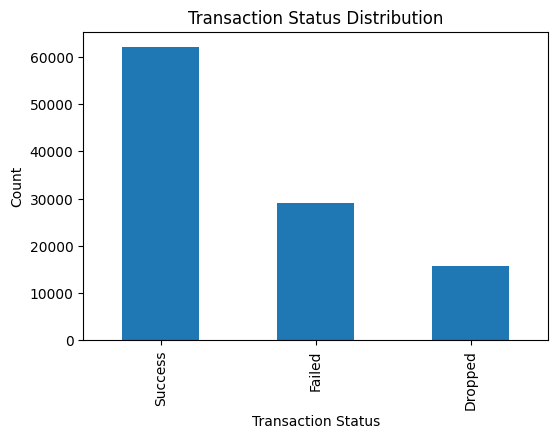

🔍 Key Insights:
✅ Majority of transactions are successful
⚠️ Failures & drop-offs form a visible minority
📌 Indicates scope for reliability and UX improvements


In [12]:
print("="*100)
print("EDA STEP 1: OVERALL DATASET OVERVIEW")
print("="*100)

print(f"Total Transactions : {df.shape[0]}")
print(f"Total Features     : {df.shape[1]}")

print("\nTransaction Status Distribution:")
print(df["Transaction_Status"].value_counts(normalize=True)*100)

print("="*100)
print("📊 TRANSACTION STATUS OVERVIEW")
print("="*100)

status_counts = df["Transaction_Status"].value_counts()

plt.figure(figsize=(6,4))
status_counts.plot(kind="bar")
plt.title("Transaction Status Distribution")
plt.xlabel("Transaction Status")
plt.ylabel("Count")
plt.show()

print("🔍 Key Insights:")
print("✅ Majority of transactions are successful")
print("⚠️ Failures & drop-offs form a visible minority")
print("📌 Indicates scope for reliability and UX improvements")


EDA STEP 2: PAYMENT METHOD PERFORMANCE
Success Rate (%) by Payment Method:

Payment_Method
UPI            65.469419
Wallet         60.738336
Debit Card     54.491044
Credit Card    51.521739
Net Banking    47.276280
Name: Is_Success, dtype: float64

Insight:
- UPI & Wallets usually show higher success
- Net Banking trends to be less reliable

💳 PAYMENT METHOD PERFORMANCE


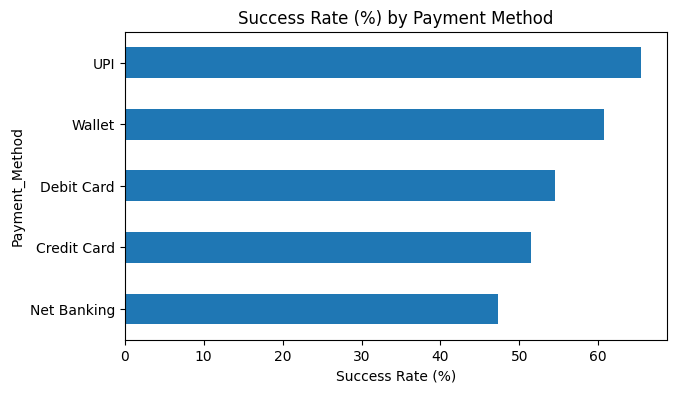

🔍 Key Insights:
🚀 UPI shows highest success due to simplified flow
🏦 Net Banking shows lower reliability (multi-step process)
📊 Payment method choice strongly impacts success


In [13]:
print("\n" + "="*100)
print("EDA STEP 2: PAYMENT METHOD PERFORMANCE")
print("="*100)

pm_analysis = (
    df.groupby("Payment_Method")["Is_Success"]
    .mean()
    .sort_values(ascending=False) * 100
)

print("Success Rate (%) by Payment Method:\n")
print(pm_analysis)

print("\nInsight:")
print("- UPI & Wallets usually show higher success")
print("- Net Banking trends to be less reliable")
print("\n" + "="*100)
print("💳 PAYMENT METHOD PERFORMANCE")
print("="*100)

pm_success = df.groupby("Payment_Method")["Is_Success"].mean() * 100

plt.figure(figsize=(7,4))
pm_success.sort_values().plot(kind="barh")
plt.title("Success Rate (%) by Payment Method")
plt.xlabel("Success Rate (%)")
plt.show()

print("🔍 Key Insights:")
print("🚀 UPI shows highest success due to simplified flow")
print("🏦 Net Banking shows lower reliability (multi-step process)")
print("📊 Payment method choice strongly impacts success")


EDA STEP 3: NETWORK TYPE IMPACT
Success Rate (%) by Network Type:

Network_Type
5G      65.589618
WiFi    63.931186
4G      58.805915
3G      48.762191
2G      42.113489
Name: Is_Success, dtype: float64

Insight:
- Poor networks (2G/3G) have higher failure & drop rates
- WiFi & 5G show best reliability

📡 NETWORK QUALITY IMPACT


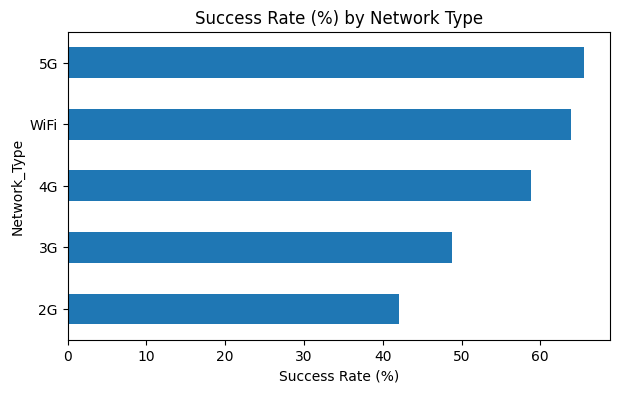

🔍 Key Insights:
📉 2G / 3G networks show significantly lower success
📶 WiFi & 5G provide the most stable experience
🛠️ Network infrastructure is a key reliability driver


In [14]:
print("\n" + "="*100)
print("EDA STEP 3: NETWORK TYPE IMPACT")
print("="*100)

network_analysis = (
    df.groupby("Network_Type")["Is_Success"]
    .mean()
    .sort_values(ascending=False) * 100
)

print("Success Rate (%) by Network Type:\n")
print(network_analysis)

print("\nInsight:")
print("- Poor networks (2G/3G) have higher failure & drop rates")
print("- WiFi & 5G show best reliability")
print("\n" + "="*100)
print("📡 NETWORK QUALITY IMPACT")
print("="*100)

network_success = df.groupby("Network_Type")["Is_Success"].mean() * 100

plt.figure(figsize=(7,4))
network_success.sort_values().plot(kind="barh")
plt.title("Success Rate (%) by Network Type")
plt.xlabel("Success Rate (%)")
plt.show()

print("🔍 Key Insights:")
print("📉 2G / 3G networks show significantly lower success")
print("📶 WiFi & 5G provide the most stable experience")
print("🛠️ Network infrastructure is a key reliability driver")



EDA STEP 4: FAILURE REASON ANALYSIS
Top Failure Reasons:

Failure_Reason
Insufficient Balance     9222
Network Timeout          6403
Authentication Failed    4292
User Abandoned           2926
Bank Server Down         2425
Limit Exceeded           2315
Gateway Error            1487
Name: count, dtype: int64

Insight:
- Insufficient Balance & Network Timeout dominate failures
- Gateway & bank issues are less frequent but critical

❌ FAILURE REASON ANALYSIS


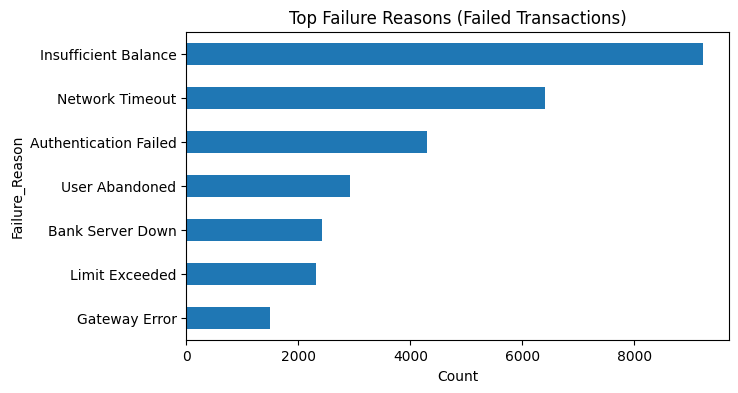

🔍 Key Insights:
💸 Insufficient balance is the most common failure
📡 Network timeout & authentication issues are major contributors
🏦 Bank/server failures are less frequent but critical


In [15]:
print("\n" + "="*100)
print("EDA STEP 4: FAILURE REASON ANALYSIS")
print("="*100)

failure_reasons = (
    df[df["Transaction_Status"] == "Failed"]
    ["Failure_Reason"]
    .value_counts()
)

print("Top Failure Reasons:\n")
print(failure_reasons)

print("\nInsight:")
print("- Insufficient Balance & Network Timeout dominate failures")
print("- Gateway & bank issues are less frequent but critical")
print("\n" + "="*100)
print("❌ FAILURE REASON ANALYSIS")
print("="*100)

failure_counts = (
    df[df["Transaction_Status"] == "Failed"]
    ["Failure_Reason"]
    .value_counts()
)

plt.figure(figsize=(7,4))
failure_counts.sort_values().plot(kind="barh")
plt.title("Top Failure Reasons (Failed Transactions)")
plt.xlabel("Count")
plt.show()

print("🔍 Key Insights:")
print("💸 Insufficient balance is the most common failure")
print("📡 Network timeout & authentication issues are major contributors")
print("🏦 Bank/server failures are less frequent but critical")


EDA STEP 5: TRANSACTION AMOUNT ANALYSIS
Transaction Amount Summary:

count    105484.000000
mean        846.105432
std         671.224545
min          32.750000
25%         414.420000
50%         663.460000
75%        1059.502500
max       16843.300000
Name: Transaction_Amount, dtype: float64

Insight:
- Majority transactions are low-value
- High-value outliers exist → median preferred over mean

💰 TRANSACTION AMOUNT DISTRIBUTION


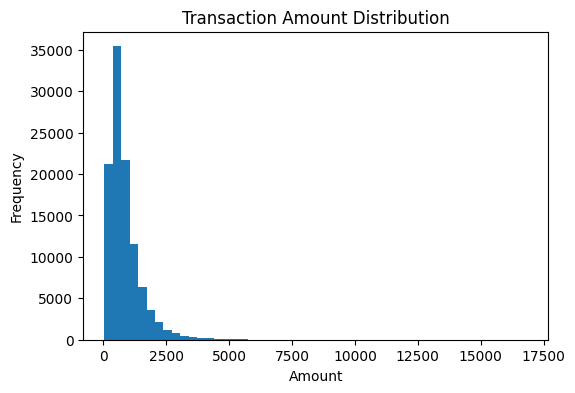

🔍 Key Insights:
🪙 Majority transactions are low-to-mid value
📈 Few high-value outliers exist
📊 Median is a better metric than mean


In [16]:
print("\n" + "="*100)
print("EDA STEP 5: TRANSACTION AMOUNT ANALYSIS")
print("="*100)

print("Transaction Amount Summary:\n")
print(df["Transaction_Amount"].describe())

print("\nInsight:")
print("- Majority transactions are low-value")
print("- High-value outliers exist → median preferred over mean")
print("\n" + "="*100)
print("💰 TRANSACTION AMOUNT DISTRIBUTION")
print("="*100)

plt.figure(figsize=(6,4))
plt.hist(df["Transaction_Amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("🔍 Key Insights:")
print("🪙 Majority transactions are low-to-mid value")
print("📈 Few high-value outliers exist")
print("📊 Median is a better metric than mean")


🔍 ADVANCED INSIGHT 1: MERCHANT VULNERABILITY MATRIX


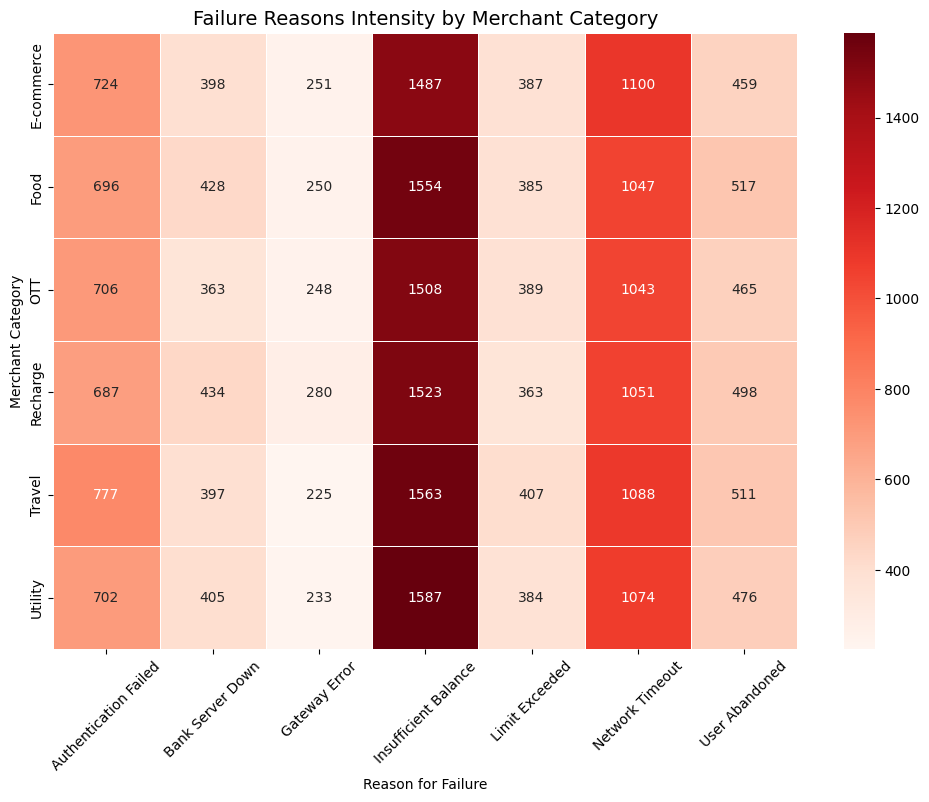


🔍 INSIGHT:
GRAPH INTERPRETATION:
1. Failures are NOT strongly merchant-category specific.
 Almost all merchant categories show similar failure intensity patterns.
2. 'Insufficient Balance' and 'Network Timeout' are consistently the top failure reasons
 across E-commerce, Food, OTT, Recharge, Travel, and Utility merchants.
3. This indicates system-wide and user-side issues rather than merchant-level problems.
4. Actionable Insight:
 Focus should be on network stability improvements and user balance awareness
 instead of merchant-specific error handling.


In [17]:
# 1. Filter only Failed Transactions
failed_df = df[df['Transaction_Status'] == 'Failed']

# 2. Create a Pivot Table: Rows = Merchant, Cols = Reason, Values = Count
heatmap_data = pd.crosstab(failed_df['Merchant_Category'], failed_df['Failure_Reason'])

# Explanation Print
print("\n" + "="*100)
print("🔍 ADVANCED INSIGHT 1: MERCHANT VULNERABILITY MATRIX")
print("="*100)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds', linewidths=0.5)
plt.title('Failure Reasons Intensity by Merchant Category', fontsize=14)
plt.xlabel('Reason for Failure')
plt.ylabel('Merchant Category')
plt.xticks(rotation=45)
plt.show()
# --- INSIGHT PRINT BLOCK ---
print("\n" + "="*100)
print("🔍 INSIGHT:")
print("="*100)
print("GRAPH INTERPRETATION:")
print("1. Failures are NOT strongly merchant-category specific.")
print(" Almost all merchant categories show similar failure intensity patterns.")
print("2. 'Insufficient Balance' and 'Network Timeout' are consistently the top failure reasons")
print(" across E-commerce, Food, OTT, Recharge, Travel, and Utility merchants.")
print("3. This indicates system-wide and user-side issues rather than merchant-level problems.")
print("4. Actionable Insight:")
print(" Focus should be on network stability improvements and user balance awareness")
print(" instead of merchant-specific error handling.")
print("="*100)


🏆 ADVANCED INSIGHT 2: BANK & METHOD PERFORMANCE MATRIX


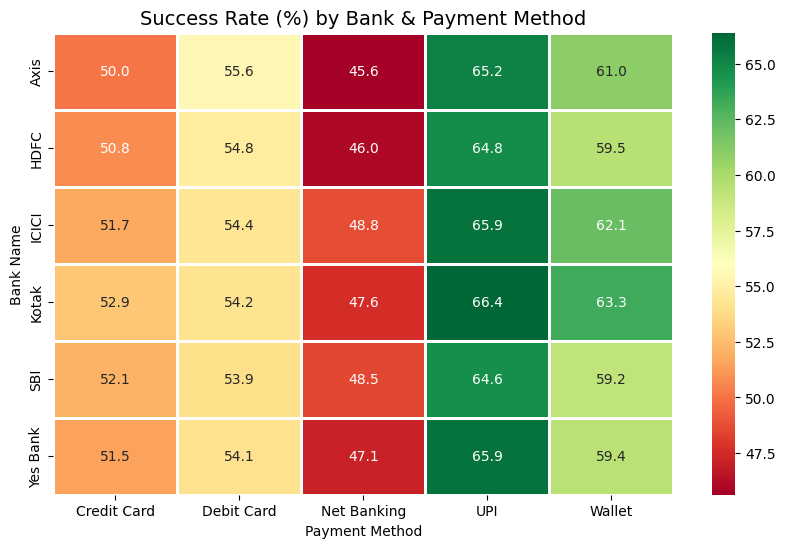


🏆 INSIGHT:
GRAPH INTERPRETATION:
1. Payment Method has a stronger impact on success rate than Bank selection.
2. UPI shows consistently higher success rates across all banks.
 This indicates better reliability and lower friction for UPI transactions.
3. Net Banking consistently underperforms across banks,
 suggesting method-level usability or technical issues.
4. Bank-wise variation exists but is secondary compared to payment method impact.
5. Recommendation Insight:
 UPI can be softly prioritized in payment recommendations,
 while Net Banking should not be promoted as a default option.


In [18]:
# Create Success Rate Matrix
bank_method_matrix = df.pivot_table(index='Bank_Name', columns='Payment_Method', values='Is_Success', aggfunc='mean')
bank_method_matrix = bank_method_matrix * 100  # Convert to Percentage

# Explanation Print
print("\n" + "="*100)
print("🏆 ADVANCED INSIGHT 2: BANK & METHOD PERFORMANCE MATRIX")
print("="*100)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(bank_method_matrix, annot=True, fmt='.1f', cmap='RdYlGn', linewidths=1)
plt.title('Success Rate (%) by Bank & Payment Method', fontsize=14)
plt.ylabel('Bank Name')
plt.xlabel('Payment Method')
plt.show()
# --- INSIGHT PRINT BLOCK ---
print("\n" + "="*100)
print("🏆 INSIGHT:")
print("="*100)
print("GRAPH INTERPRETATION:")
print("1. Payment Method has a stronger impact on success rate than Bank selection.")
print("2. UPI shows consistently higher success rates across all banks.")
print(" This indicates better reliability and lower friction for UPI transactions.")
print("3. Net Banking consistently underperforms across banks,")
print(" suggesting method-level usability or technical issues.")
print("4. Bank-wise variation exists but is secondary compared to payment method impact.")
print("5. Recommendation Insight:")
print(" UPI can be softly prioritized in payment recommendations,")
print(" while Net Banking should not be promoted as a default option.")
print("="*100)

In [19]:
print("OVERALL KEY TAKEAWAY")

print("Transaction failures are driven more by systemic factors such as")
print("network reliability, balance availability, and payment method choice")
print("rather than merchant category, transaction duration, or bank-specific issues.")

OVERALL KEY TAKEAWAY
Transaction failures are driven more by systemic factors such as
network reliability, balance availability, and payment method choice
rather than merchant category, transaction duration, or bank-specific issues.
